In [61]:
import numpy as np
import matplotlib.pyplot as plt
import csv

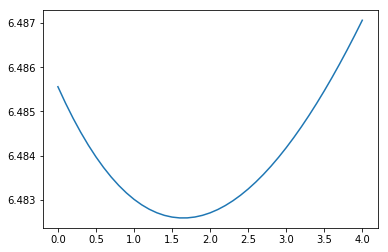

In [62]:
def retrieve_train_data(ith_fold):
    with open('regression/fData'+str(ith_fold)+'.csv', 'r') as data_file:
        data = np.float32(np.insert(np.array(list(csv.reader(data_file))),0,1,axis=1))
    with open('regression/fLabels'+str(ith_fold)+'.csv', 'r') as label_file:
        label = np.float32(np.array(list(csv.reader(label_file))).ravel())
        return data, label

def regression(data_train,label_train,_lambda):
    return (np.linalg.inv(data_train.transpose().dot(data_train)+_lambda*np.identity(3)))\
.dot(data_train.transpose()).dot(label_train)

if __name__=='__main__':
    num_folds=10
    data_fold=20
    fold_lst=np.arange(1,num_folds+1)
    lambda_lst=np.arange(0,4.1,0.1)
    all_data=np.empty((0,3),dtype=np.float32)
    all_label=np.empty((0),dtype=np.float32)
    acc=[]
    for i in fold_lst:
        data,label=retrieve_train_data(i)
        all_data=np.concatenate((all_data,data),axis=0)
        all_label=np.append(all_label,label)
    for _lambda in lambda_lst:
        acc_each=[]
        for i in fold_lst:
            data_train=np.delete(all_data,np.arange(data_fold)+(i-1)*data_fold,axis=0)
            label_train=np.delete(all_label,np.arange(data_fold)+(i-1)*data_fold,axis=0)
            data_test=all_data[(i-1)*data_fold:data_fold*i]
            label_test=all_label[(i-1)*data_fold:data_fold*i]
            w=regression(data_train,label_train,_lambda)
            #test
            acc_each.append(np.linalg.norm((data_test.dot(w)-label_test)))
        acc.append(np.mean(acc_each))
    plt.plot(lambda_lst,acc)
    plt.show()